# Análisis de la función de costo

## Imports y configuraciones

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
sys.path.append('../src') # permite importar modulos de otros directorios
sys.path.append('../../../lab3/ej7/src')

In [4]:
from ds_preprocessing import DataSetPreprocessor
from arff_helper import DataSet
from log_regression import cost_function, target_function

## Carga y preprocesamiento del dataset

Para todas las pruebas utilizaremos el dataset de entrenamiento de la tercer entrega el cual contiene un 80% 
de las instancias del dataset completo tomadas al azar.

### Carga del dataset 

In [5]:
ds = DataSet()
ds.load_from_arff('../../../lab3/ej7/datasets/Autism-Adult-Training-Subset.arff')

Eliminamos la fila 305, para la cual el atributo ```age``` no esta definido. De esta forma evitamos que al hacer operaciones con matrices aparezcan valores ```nan```. Se puede ver que al calcular el gradiente (ver [código](#analisis-funcion-costo)):

```gradient = (1/m)*(X.transpose() @ (target_function(X, theta)-y)))```

si se mantiene una entrada de la matriz ```X``` en ```nan```, todas las entradas del resultado de multiplicar ```X.transpose()``` por ```target_function(X, theta)-y``` estarán en ```nan```.

In [6]:
ds.pandas_df = ds.pandas_df.drop([305])\
    .reset_index()\
    .drop(columns=['index'])

Separamos la columna con el atributo objetivo y la guardamos en ```y```:

In [7]:
target_attribute = 'Class/ASD'
y = ds.pandas_df[target_attribute]

### Transformación a atributos numéricos 

In [8]:
preprocessor = DataSetPreprocessor(ds, target_attribute)
X = preprocessor.transform_to_rn()\
    .drop(columns=target_attribute)\
    .as_matrix()

Transformamos el vector ```y``` en binario (enteros 1 o 0):

In [9]:
le = LabelEncoder()
y = le.fit_transform(y)

**Esto es importante ya que entre otras cosas, para el cálculo del costo se realizan operaciones con este vector.**

## Análisis de la función de costo
A continuación hacemos **1 sola iteración** del descenso por gradiente y finalmente mostramos el valor de la función de costo $J(\theta)$ para el vector $\theta$ calculado. 

La función de costo elegida es : 

$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}{[y^{(i)}log(h_\theta(x^{(i)})) + (1-y^{(i)})log(1-h_\theta(x^{(i)}))]}$

y el valor inicial para $\theta$ es 0 ($\theta_j = 0$ para todo j ).

<a id='analisis-funcion-costo'></a>

In [10]:
m = X.shape[0]
alpha = 0.1
theta = np.zeros(X.shape[1])
gradient = (1/m)*(X.transpose() @ (target_function(X, theta)-y))
theta = theta - alpha*gradient
print('J(theta) = {}'.format(cost_function(X, y, theta)))

J(theta) = 0.6650958892540617


En la siguiente función implementamos el descenso por gradiente en modo batch con una cantidad determinada de iteraciones [[1]](#referencia-1). De forma resumida es lo siguiente :

Repetir n veces:

1. Calcular el gradiente con las m instancias en X y simultáneamente para las j componentes de $\theta$:
<br><br>$\frac{\delta}{\delta\theta_j}J(\theta) = \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$ 
<br>$\frac{\delta}{\delta\theta}J(\theta) = \frac{1}{m}X^T(h_\theta(X)-y)$ (vectorialmente)<br><br>
2. Con el gradiente calculado en el paso anterior ajustar simultáneamente las j componentes de $\theta$:
<br><br>$\theta := \theta - \alpha\frac{\delta}{\delta\theta}J(\theta)$ (vectorialmente)

In [11]:
def gradient_descent(X, y, alpha, max_iterations):
    cost_array = []
    theta = np.zeros(X.shape[1])
    for _ in range(max_iterations):
        gradient = (1/m)*(X.transpose() @ (target_function(X, theta)-y))
        theta = theta - alpha*gradient
        cost_array.append(cost_function(X, y, theta))
    return cost_array

Aplicamos el descenso y graficamos el costo en cada iteración :

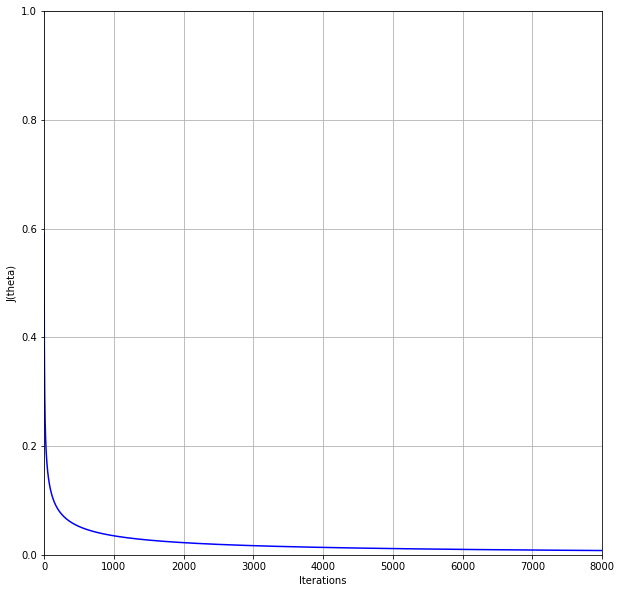

In [21]:
cost_array = gradient_descent(X, y, 1, 8000)
plt.figure(figsize=(10,10))
plt.ylabel('J(theta)')
plt.xlabel('Iterations')
plt.axis([0, len(cost_array)-1, 0, 1])
plt.grid(True)
plt.plot(cost_array, color='b')
plt.show()

Últimos 3 valores de la función de costo :

In [13]:
print('\n{}'.format(cost_array[-3]))
print('{}'.format(cost_array[-2]))
print('{}\n'.format(cost_array[-1]))


0.00785760410706116
0.00785679892598229
0.007855993917521644



## Referencias

[1] - <a id='referencia-1'></a> Regresión Logística, Nota del curso de Aprendizaje Automático, 2018, Guillermo Moncecchi